<a href="https://colab.research.google.com/github/taruma/inkovis/blob/master/notebook/inkovis_nb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INKOVIS

Buku (_jupyter notebook_) ini hanya digunakan untuk memvisualisasikan data.

Informasi lebih lanjut kunjungi _github repository_ [taruma/inkovis](https://github.com/taruma/inkovis).

# INISIASI BUKU

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# DATASET

In [0]:
ALAMAT_DATASET_EXCEL = 'https://github.com/taruma/inkovis/raw/master/dataset/data_infeksi_covid19_indonesia.xlsx'

In [3]:
raw_dataset = pd.read_excel(ALAMAT_DATASET_EXCEL, index_col=0, parse_dates=True)
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37 entries, 2020-02-18 to 2020-03-25
Data columns (total 8 columns):
jumlah_periksa     37 non-null int64
konfirmasi         37 non-null int64
sembuh             37 non-null int64
meninggal          37 non-null int64
negatif            37 non-null int64
proses_periksa     37 non-null int64
kasus_perawatan    37 non-null int64
catatan            7 non-null object
dtypes: int64(7), object(1)
memory usage: 2.6+ KB


In [4]:
raw_dataset.tail()

,jumlah_periksa,konfirmasi,sembuh,meninggal,negatif,proses_periksa,kasus_perawatan,catatan
tanggal,,,,,,,,
2020-03-21,2365,450,20,38,1895,22,0,NaN
2020-03-22,2483,579,30,49,1904,0,500,"tidak tersedia PDF, diambil dari tampilan pada..."
2020-03-23,2756,579,30,49,2177,0,500,NaN
2020-03-24,3332,686,30,55,2625,0,601,"(informasi kasus perawatan diambil di situs, p..."
2020-03-25,3332,790,31,58,2625,0,701,"(informasi diambil di situs, pada 2020-03-25 2..."


# VISUALISASI DATA

In [0]:
FIG_SIZE = (20, 8)

## JUMLAH KASUS KONFIRMASI POSITIF

### Kode

In [0]:
def plot_covid_case(
    dataset, ax, mask=None, days=1, 
    text_left=None, text_right=None,
    show_numbers=True, show_diff=False,
    show_hist=True, show_diff_bar=True
    ):

    slice_data = (
        slice(None, None, days) if mask is None else slice(*mask, days)
    )

    data = dataset[slice_data]

    date_index = data.index

    date_ticks = date_index.strftime('%d\n%b').to_list()

    rows, cols = data.shape

    total_confirmed = data['konfirmasi'].values
    total_recovered = data['sembuh'].values
    total_deaths = data['meninggal'].values

    total_positive = total_confirmed - total_recovered - total_deaths

    x_pos = np.arange(0, rows*2, 2)
    x_pos_diff = x_pos[:-1] + 1

    # LINE
    ax.plot(
        x_pos, total_confirmed,
        color='blue', linestyle='--', 
        marker='o', markerfacecolor='orange')

    # BAR
    ## POSITIVE
    ax.bar(
        x_pos, total_positive, bottom=total_deaths+total_recovered,
        color='orange', label='Dalam Perawatan (Positif COVID-19)'
    )

    ## RECOVERED
    ax.bar(
        x_pos, total_recovered, bottom=total_deaths,
        color='green', label='Sembuh (Positif COVID-19)'
    )

    ## DEATHS
    ax.bar(
        x_pos, total_deaths,
        color='red', label='Meninggal (Positif COVID-19)'
    )

    # DIFF
    
    diff_confirmed = np.diff(total_confirmed)
    diff_deaths = np.diff(total_deaths)
    diff_recovered = np.diff(total_recovered)
    diff_positive = np.diff(total_positive)

    if show_diff_bar:
        # BAR (DIFF)
        ## DEATHS
        ax.bar(
            x_pos_diff, diff_deaths,
            bottom=total_confirmed[:-1],
            color='red', edgecolor='black', alpha=0.5
        )

        ## RECOVERED
        ax.bar(
            x_pos_diff, diff_recovered,
            bottom=total_confirmed[:-1]+diff_deaths,
            color='green', edgecolor='black', alpha=0.5
        )

        ## POSITIVE
        ax.bar(
            x_pos_diff, diff_positive,
            bottom=total_confirmed[:-1]+diff_deaths+diff_recovered,
            color='orange', edgecolor='black', alpha=0.5
        )

    # ANNOTATION
    ann_space = 10*5 + 5 if show_hist else 10

    if show_numbers:
        for i, val in enumerate(total_confirmed):

            # TOTAL CASE
            text = f'{total_positive[i]}\n{total_recovered[i]}\n{total_deaths[i]}'
            if show_hist:
                ax.annotate(
                    text, (x_pos[i], val), xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='bottom', size=10,
                    bbox=dict(
                        facecolor='white', alpha=0.7, boxstyle='square'
                    )
                )

            ax.annotate(
                f'{val}', (x_pos[i], val), xytext=(0, ann_space),
                textcoords='offset points',
                ha='center', va='bottom', 
                size=12, color='white', fontweight='bold',
                bbox=dict(
                    facecolor='red', alpha=0.7, boxstyle='round'
                )           
            )

            # TEXT DIFF
            if i > 0 and show_diff:
                text_diff = (
                    f'{diff_positive[i-1]}\n{diff_recovered[i-1]}' + 
                    f'\n{diff_deaths[i-1]}')
                


                if show_hist:
                    ax.annotate(
                        text_diff, 
                        (x_pos[i]-1, val), xytext=(0,10),
                        textcoords='offset points',
                        ha='center', va='bottom', size=10,
                        bbox=dict(facecolor='gray', alpha=0.1, boxstyle='square')
                    )

                ax.annotate(
                    f'{total_confirmed[i]-total_confirmed[i-1]}',
                    (x_pos[i]-1, val), xytext=(0,ann_space),
                    textcoords='offset points',
                    ha='center', va='bottom', size=10,
                    bbox=dict(facecolor='red', alpha=0.3, boxstyle='round')
                )

    # INFO
    
    text_right = (
        'Data: Situasi Terkini Perkembangan COVID-19 ' + 
        '(infeksiemerging.kemkes.go.id)' 
        if text_right is None else
        text_right
    )
    ax.text(
        1, -0.1, text_right,
        horizontalalignment='right',
        verticalalignment='top', style='normal', family='monospace',
        transform = ax.transAxes
    )

    text_left = (
        '' if text_left is None else
        text_left
    )

    ax.text(
        0, -0.1, text_left,
        horizontalalignment='left',
        verticalalignment='top', style='normal', family='serif',
        transform = ax.transAxes
    )

    # LEGEND
    ax.set_xticks(x_pos)
    ax.grid(True, axis='both')
    ax.set_xticklabels(date_ticks, rotation=0)
    ax.set_title('KASUS POSITIF COVID-19 DI INDONESIA', fontsize='x-large', fontweight='bold')
    ax.set_xlabel('Tanggal', fontsize=14)
    ax.set_ylabel('Jumlah Kasus', fontsize=14)
    ax.set_ylim(0, round(max(total_confirmed)+200, -2))
    ax.legend(loc='upper left')
    ax.margins(x=0.01)

    plt.tight_layout()

### GRAFIK

#### Seluruh Data (Per 2 Hari)

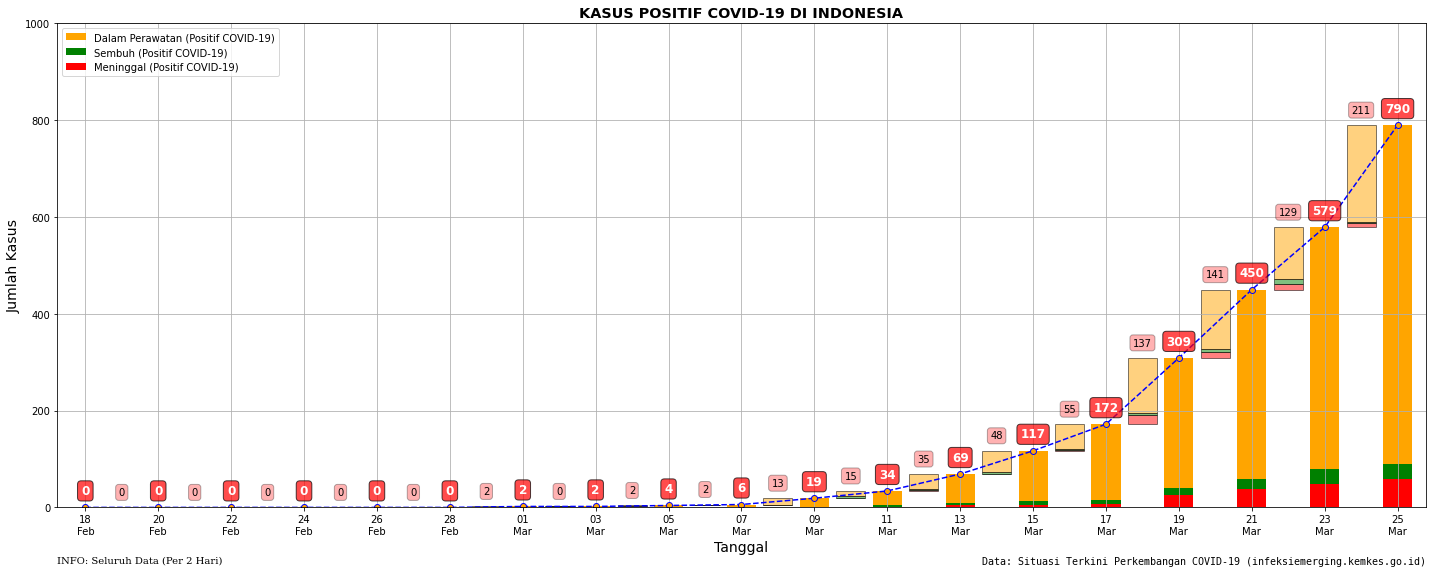

In [7]:
fig, ax = plt.subplots(figsize=FIG_SIZE)

plot_covid_case(
    raw_dataset, ax, days=2,
    show_diff=True, show_hist=False,
    text_left='INFO: Seluruh Data (Per 2 Hari)'
)

plt.savefig('GRAFIK_KASUS_POSITIF_S_2HARI.png',dpi=150)

#### Sejak Maret (Harian)

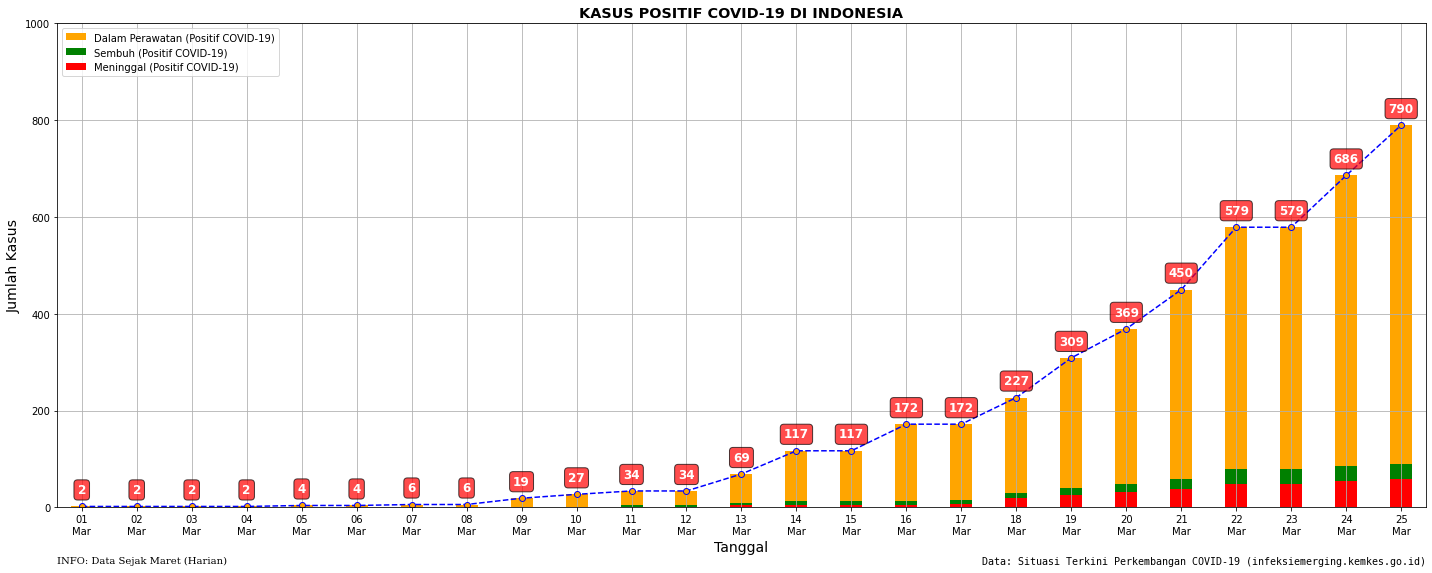

In [8]:
fig, ax = plt.subplots(figsize=FIG_SIZE)

plot_covid_case(
    raw_dataset, ax, mask=('2020-03', None), days=1,
    show_hist=False, show_diff_bar=False,
    text_left='INFO: Data Sejak Maret (Harian)')

plt.savefig('GRAFIK_KASUS_POSITIF_SMARET_HARIAN.png',dpi=150)

#### Sejak Maret, Per 2 Hari

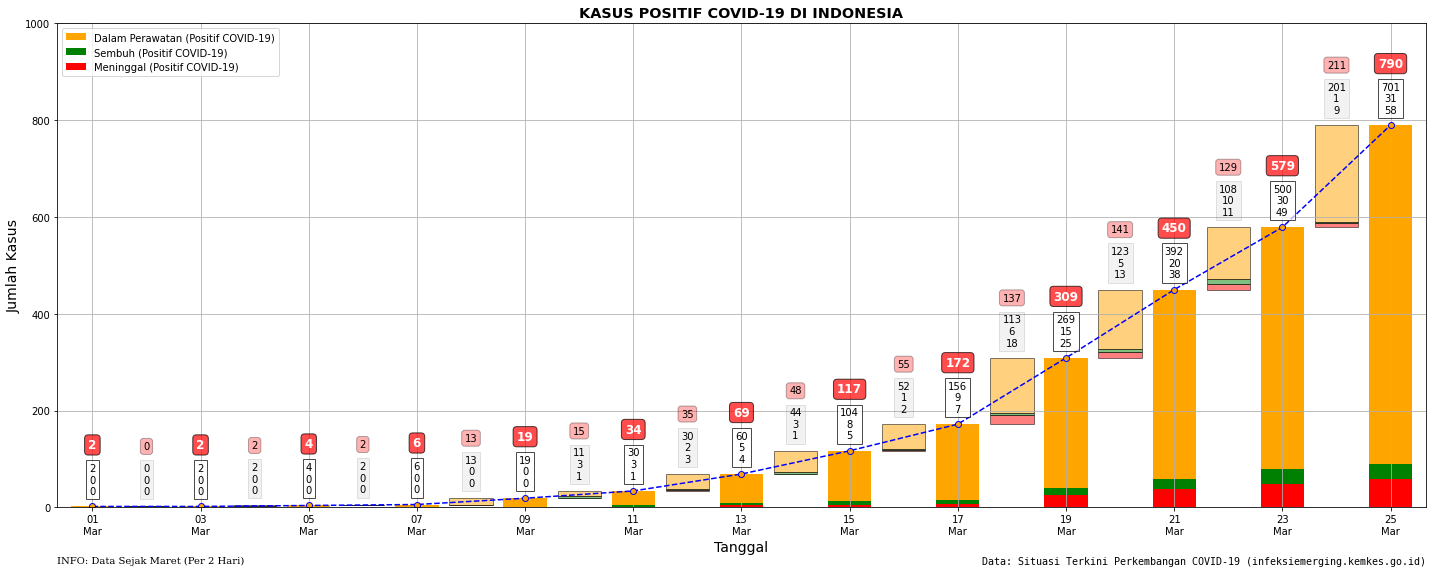

In [9]:
fig, ax = plt.subplots(figsize=FIG_SIZE)

plot_covid_case(
    raw_dataset, ax, mask=('2020-03', None), days=2,
    show_diff=True,
    text_left="INFO: Data Sejak Maret (Per 2 Hari)")

plt.savefig('GRAFIK_KASUS_POSITIF_SMARET_2HARI.png',dpi=150)

#### 15 Hari Terakhir (Harian)

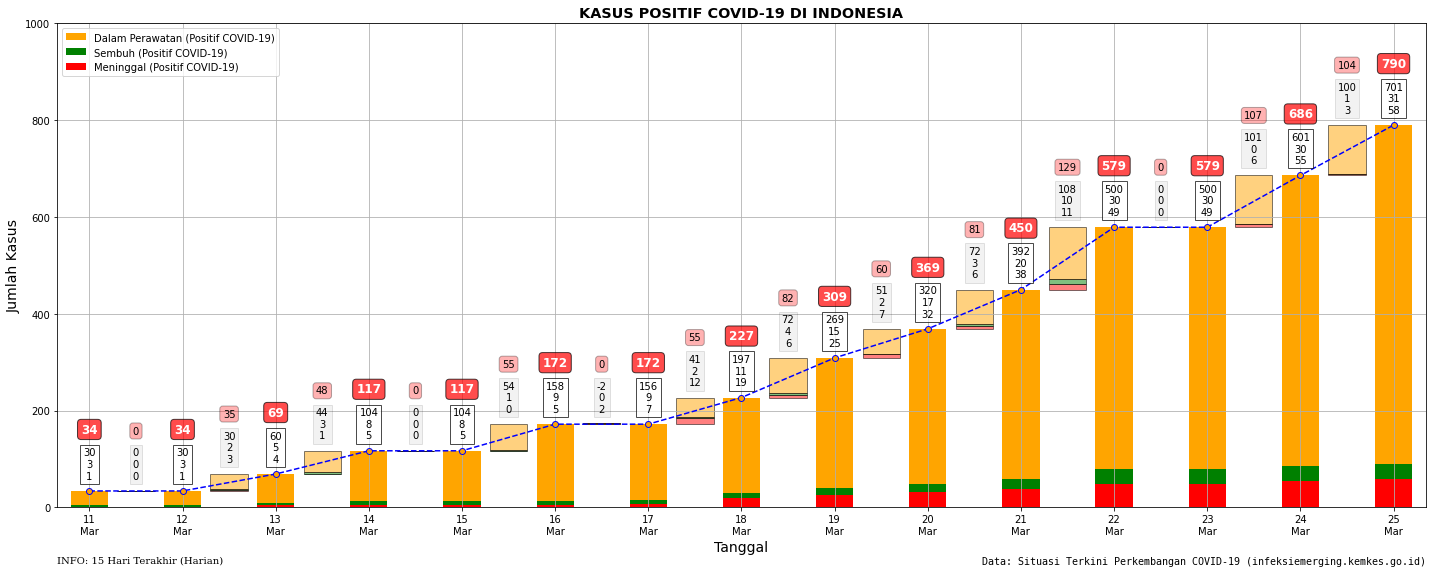

In [10]:
fig, ax = plt.subplots(figsize=FIG_SIZE)

plot_covid_case(
    raw_dataset[-15:], ax, days=1,
    show_diff=True,
    text_left='INFO: 15 Hari Terakhir (Harian)'
)
plt.savefig('GRAFIK_KASUS_POSITIF_15AKHIR_HARIAN.png',dpi=150)

## JUMLAH SPESIMEN/PENGUJIAN

### KODE

In [0]:
def plot_covid_test(
    dataset, ax, mask=None, days=1,
    text_left=None, text_right=None,
    show_numbers=True, show_diff=False,
    show_hist=True, show_diff_bar=True
    ):

    slice_data = (
        slice(None, None, days) if mask is None else slice(*mask, days)
    )

    data = dataset[slice_data]
    date_index = data.index
    date_ticks = date_index.strftime('%d\n%b').to_list()
    rows, _ = data.shape

    total_tests = data['jumlah_periksa'].values
    total_positive = data['konfirmasi'].values
    total_negative = data['negatif'].values
    total_checks = data['proses_periksa'].values

    x_pos = np.arange(0, rows*2, 2)
    x_pos_diff = x_pos[:-1] + 1

    # LINE
    ax.plot(
        x_pos, total_tests,
        color='blue', linestyle='--',
        marker='o', markerfacecolor='orange'
    )

    # BAR
    ## POSITIVE
    ax.bar(
        x_pos, total_positive, bottom=total_negative+total_checks,
        color='red', label='POSITIF COVID-19'
    )

    ## NEGATIVE
    ax.bar(
        x_pos, total_negative, bottom=total_checks,
        color='orange', label='NEGATIF COVID-19'
    )

    ## CHECKS
    ax.bar(
        x_pos, total_checks,
        color='yellow', label='PROSES PEMERIKSAAN'
    )

    # DIFF
    diff_tests = np.diff(total_tests)
    diff_positive = np.diff(total_positive)
    diff_negative = np.diff(total_negative)
    diff_checks = np.diff(total_checks)

    if show_diff_bar:
        # BAR DIFF
        ## CHECKS
        ax.bar(
            x_pos_diff, diff_checks,
            bottom=total_tests[:-1],
            color='yellow', edgecolor='black', alpha=0.5
        )

        ## NEGATIVE
        ax.bar(
            x_pos_diff, diff_negative,
            bottom=total_tests[:-1]+diff_checks,
            color='orange', edgecolor='black', alpha=0.5
        )

        ## POSITIVE
        ax.bar(
            x_pos_diff, diff_positive,
            bottom=total_tests[:-1]+diff_checks+diff_negative,
            color='red', edgecolor='black', alpha=0.5
        )

    # ANNOTATION
    ann_space = 10*5 + 5 if show_hist else 10

    if show_numbers:
        for i, val in enumerate(total_tests):
            text = f'{total_positive[i]}\n{total_negative[i]}\n{total_checks[i]}'

            # TOTAL TESTS
            if show_hist:
                ax.annotate(
                    text, (x_pos[i], val), xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='bottom', size=10,
                    bbox=dict(
                        facecolor='white', alpha=0.7, boxstyle='square'
                    )
                )

            ax.annotate(
                f'{val}', (x_pos[i], val), xytext=(0, ann_space),
                textcoords='offset points',
                ha='center', va='bottom', size=12,
                color='white', fontweight='bold',
                bbox=dict(
                    facecolor='blue', alpha=0.7, boxstyle='round'
                )
            )
            
            # TEXT DIFF
            if i > 0 and show_diff:
                text_diff = (
                    f'{diff_positive[i-1]}\n{diff_negative[i-1]}' +
                    f'\n{diff_checks[i-1]}'
                )
                
                y_pos_diff = val if val > total_tests[i-1] else total_tests[i-1] 

                if show_hist:
                    ax.annotate(
                        text_diff,
                        (x_pos[i]-1, y_pos_diff), xytext=(0,10),
                        textcoords='offset points',
                        ha='center', va='bottom', size=10,
                        bbox=dict(
                            facecolor='gray', alpha=0.1, boxstyle='square'
                        )
                    )

                ax.annotate(
                    f'{total_tests[i]-total_tests[i-1]}',
                    (x_pos[i]-1, y_pos_diff), xytext=(0, ann_space),
                    textcoords='offset points',
                    ha='center', va='bottom', size=10,
                    bbox=dict(
                        facecolor='blue', alpha=0.3, boxstyle='round'
                    )
                )


    # INFO

    text_right = (
        'Data: Situasi Terkini Perkembangan COVID-19 ' + 
        '(infeksiemerging.kemkes.go.id)' 
        if text_right is None else
        text_right
    )
    ax.text(
        1, -0.1, text_right,
        horizontalalignment='right',
        verticalalignment='top', style='normal', family='monospace',
        transform = ax.transAxes
    )

    text_left = (
        '' if text_left is None else
        text_left
    )

    ax.text(
        0, -0.1, text_left,
        horizontalalignment='left',
        verticalalignment='top', style='normal', family='serif',
        transform = ax.transAxes
    )

    # LEGEND
    ax.set_xticks(x_pos)
    ax.grid(True, axis='both')
    ax.set_xticklabels(date_ticks, rotation=0)
    ax.set_title('JUMLAH SPESIMEN/UJI COVID-19 DI INDONESIA', fontsize='x-large', fontweight='bold')
    ax.set_xlabel('Tanggal', fontsize=14)
    ax.set_ylabel('Jumlah Kasus', fontsize=14)
    ax.set_ylim(0, round(max(total_tests)+1000, -2))
    ax.legend(loc='upper left')
    ax.margins(x=0.01)

    plt.tight_layout()

### Grafik

#### Seluruh Data (Per 2 Hari)

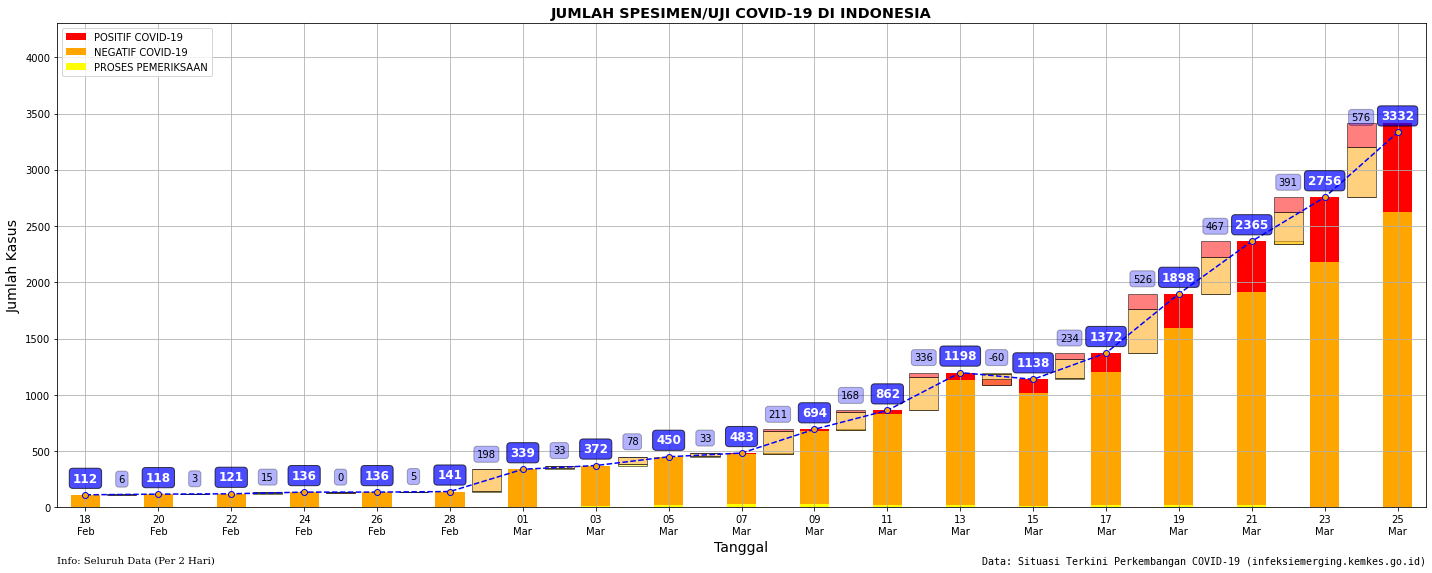

In [12]:
fig, ax = plt.subplots(figsize=(20, 8))

plot_covid_test(
    raw_dataset, ax, days=2, 
    show_diff=True, show_hist=False,
    text_left="Info: Seluruh Data (Per 2 Hari)")

plt.savefig('GRAFIK_JUMLAH_SPESIMEN_S_2HARI.png', dpi=150)

#### Sejak Bulan Maret (Harian)

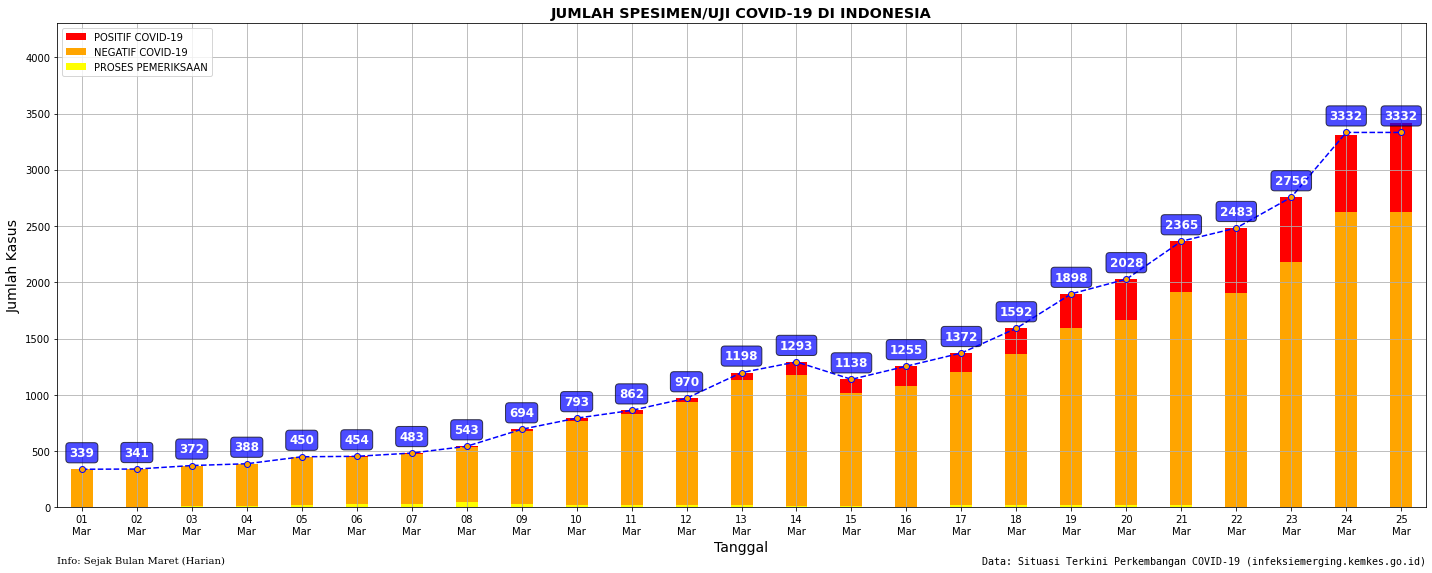

In [13]:
fig, ax = plt.subplots(figsize=(20, 8))

plot_covid_test(
    raw_dataset, ax, mask=('2020-03', None),
    show_hist=False, show_diff_bar=False,
    text_left="Info: Sejak Bulan Maret (Harian)")

plt.savefig('GRAFIK_JUMLAH_SPESIMEN_SMARET_HARIAN.png', dpi=150)

#### Sejak Bulan Maret (Per 2 Hari)

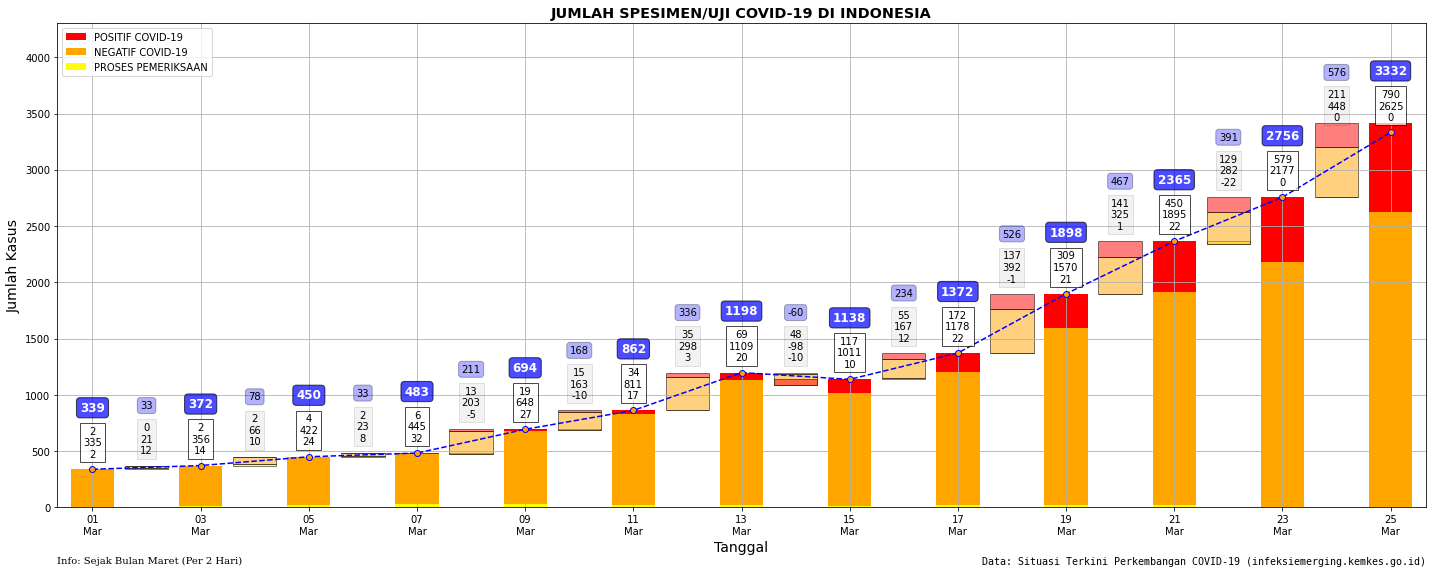

In [14]:
fig, ax = plt.subplots(figsize=(20, 8))

plot_covid_test(
    raw_dataset, ax, mask=('2020-03', None), days=2,
    show_diff=True,
    text_left="Info: Sejak Bulan Maret (Per 2 Hari)")

plt.savefig('GRAFIK_JUMLAH_SPESIMEN_SMARET_2HARI.png', dpi=150)

#### 15 Hari Terakhir (Harian)

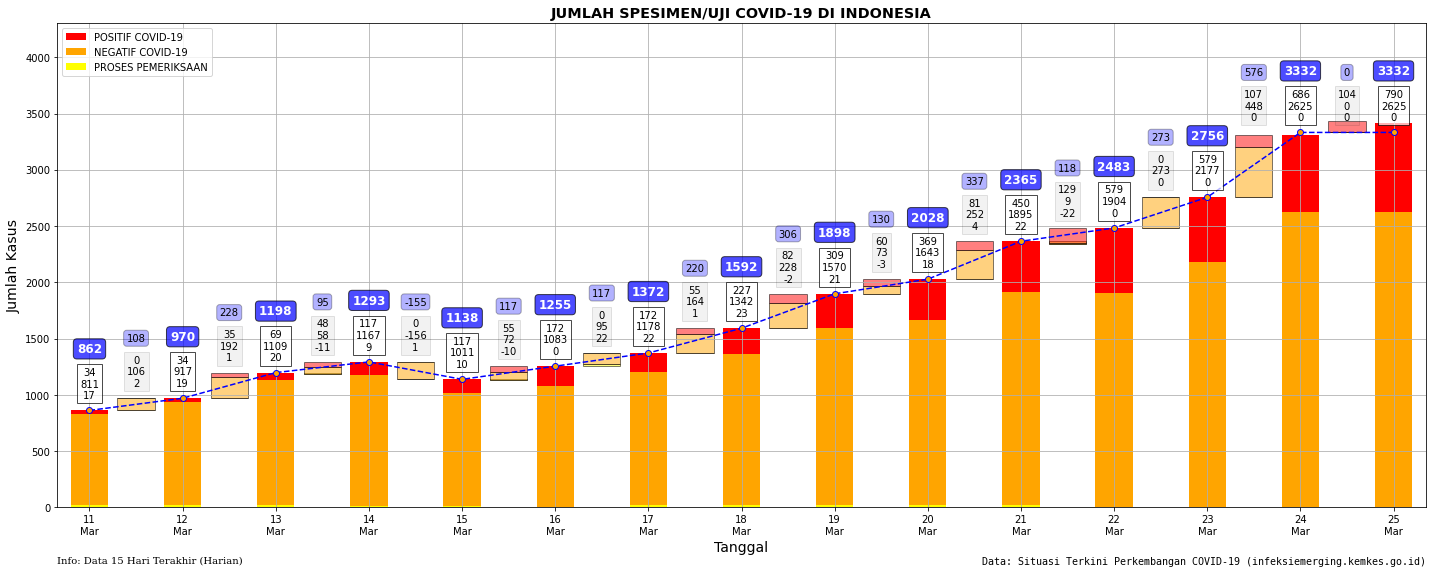

In [15]:
fig, ax = plt.subplots(figsize=(20, 8))

plot_covid_test(
    raw_dataset[-15:], ax, 
    show_diff=True, 
    text_left="Info: Data 15 Hari Terakhir (Harian)")

plt.savefig('GRAFIK_JUMLAH_SPESIMEN_15AKHIR_HARIAN.png', dpi=150)

## PERKEMBANGAN KASUS POSITIF

## PERKEMBANGAN PENGUJIAN